<a href="https://colab.research.google.com/github/aamuaamu/Indiana_University_grade_distribution/blob/Test/IU_Grade_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [62]:
# Downloading Data

# start_time = time.time()

SchYr1 = range(1995, 2012)
SchYr2 = range(2012, 2022)
terms = []
for n in SchYr1:
    fa = (n-1-1600)*10 + 8
    sp = (n-1600)*10 + 2
    su = (n-1600)*10 + 5
    terms.append(str(fa))
    terms.append(str(sp))
    terms.append(str(su) + "SS1")
    terms.append(str(su) + "SS2")
for n in SchYr2:
    fa = (n-1-1600)*10 + 8
    sp = (n-1600)*10 + 2
    su = (n-1600)*10 + 5
    terms.append(str(fa))
    terms.append(str(sp))
    terms.append(str(su))
    
begin = "https://gradedistribution.registrar.indiana.edu//distribution/export.php?term="
end = "&c=desc&r=gradedist"
df = pd.DataFrame()
for s in terms:
    # print("Term: " + s)  # For the impatient.
    url = begin + s + end
    dg = pd.read_csv(url)
    df = pd.concat([df, dg], ignore_index=True)

df.to_csv("/content/drive/MyDrive/Colab Notebooks/IU_grade_dist.csv", index=False)

# About 2 minutes on Google Colab.
# print("--- %s seconds ---" % (time.time() - start_time))

In [63]:
# === Prepare df ===
# Remove small classes
df = df[df['A'] != 'NR'].copy()
# Change values to numerical
for c in ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-','D+', 'D', 'D-', 'F']:
    df[c] = df[c].apply(lambda s: int(s))
for c in ['W', 'WX', 'I', 'R', 'P', 'S', 'NY', 'NR', 'NC', 'OTHER']:
    df[c] = df[c].apply(lambda s: int(s))
df['COURSE'] = df['COURSE'].apply(lambda s: s if type(s) == 'str' else str(s))
df['COURSE'] = df['COURSE'].apply(lambda s: int(s[1:]) if ord(s[0]) > ord('9') else int(s))
# Change values for terms
df['TERM'] = df['TERM'].apply(lambda s: s if type(s) == 'str' else str(s))
df['TERM'] = df['TERM'].apply(lambda s: int(s[:4]) + 2)
df['SchYr'] = (df['TERM'] % 1000) // 10 
df['SchYr'] = df['SchYr'].apply(lambda x: x + 1900 if x > 50 else x + 2000)
df['Sem'] = df['TERM'] % 10 
df['TERM'] = df['TERM'] - 2
# Merge GPA grades into A, B, C, and D only
for c in ['A', 'B', 'C', 'D']:
    df[c + 'R'] = 0
    for sub in ['+', '', '-']:
        df[c + 'R'] += df[c + sub]
# Merge unusual grades into 'OTHER'
for c in ['I','R','P','NY', 'NR', 'NC']:
    df['OTHER'] += df[c]
Columns = ['TERM', 'SchYr', 'Sem', 'DEPARTMENT', 'COURSE']

In [64]:
# Create a function that will plot the bar chart of dg with specified columns and title
# Save the figure with a specific filename
def grade_dist_plot(dg, columns, title, filename, colors):
    dg = dg.groupby('SchYr').sum()
    dg['Total'] = 0
    for c in columns:
        dg['Total'] += dg[c]
    for c in columns:
        dg[c] /= dg['Total']
    dg = dg[columns]
    # https://www.python-graph-gallery.com/3-control-color-of-barplots
    ax = dg.plot.bar(stacked = True, color = colors, figsize = (12,9))
    plt.title("Indiana University " + title + " Grade Distribution")
    plt.xlabel('School year ending in')
    
    # How to save a picture: https://www.kaggle.com/questions-and-answers/162231
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/IU_" + filename + 'grade_dist.jpg')

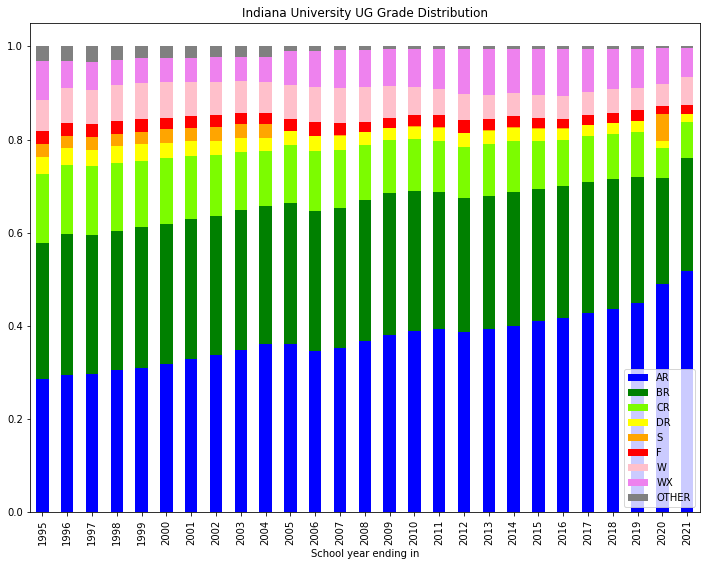

In [65]:
# Plot university-wide undergraduate grade distribution
grades = ['AR','BR','CR','DR','S','F','W','WX','OTHER']
colors = ['blue', 'green', 'lawngreen', 'yellow',  'orange', 'red', 'pink', 'violet','grey']
dg = df.copy()
dg = dg[dg['COURSE'] < 500]
dg = dg[['SchYr'] + grades]
grade_dist_plot(dg, grades, "UG", "UG_", colors)

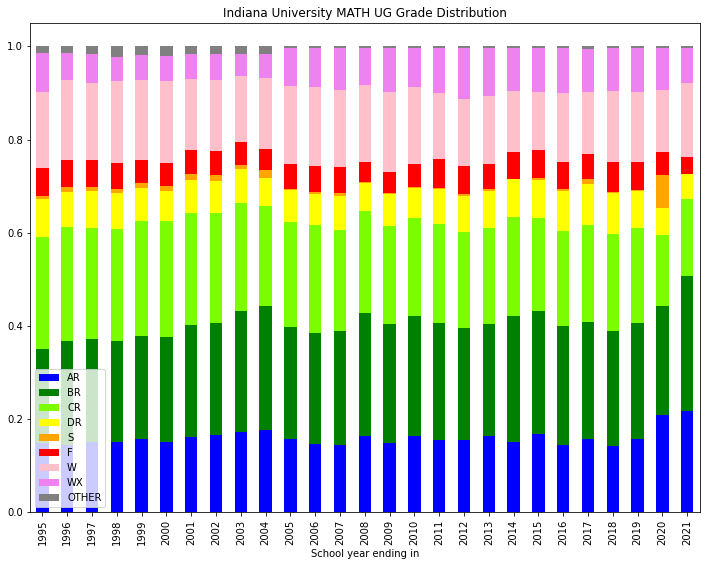

In [66]:
# Plot grade distribution of specified departments
# Drop DEPARTMENT and COURSE
grades = ['AR','BR','CR','DR','S','F','W','WX','OTHER']
colors = ['blue', 'green', 'lawngreen', 'yellow',  'orange', 'red', 'pink', 'violet','grey']
dg = df.copy()
dg = dg[(dg['COURSE'] < 500) & (dg['DEPARTMENT'] == 'MATH')]
dg = dg[['SchYr'] + grades]
grade_dist_plot(dg, grades, "MATH UG", "math_ug_", colors)

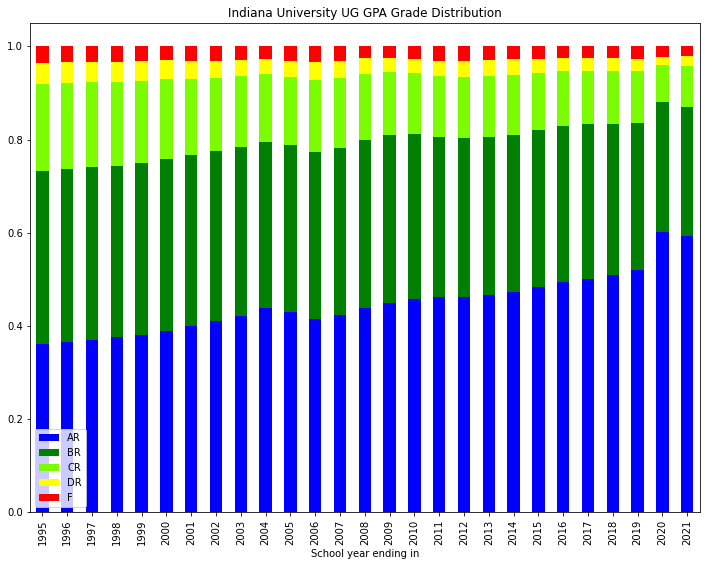

In [67]:
# Plot university-wide GPA grade distribution
# Drop DEPARTMENT and COURSE
columns = ['AR','BR','CR','DR','F']
colors = ['blue', 'green', 'lawngreen', 'yellow', 'red']
dg = df.copy()
dg = dg[dg['COURSE'] < 500]
dg = dg[['SchYr'] + columns]
grade_dist_plot(dg, columns, "UG GPA", "ug_gpa_", colors)

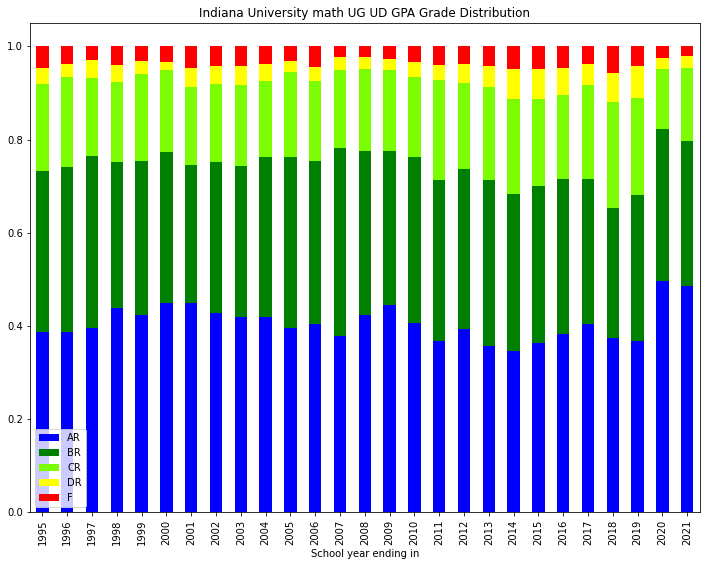

In [68]:
# Plot grade distribution of specified departments
# Drop DEPARTMENT and COURSE
dg = df.copy()
columns = ['AR','BR','CR','DR','F']
colors = ['blue', 'green', 'lawngreen', 'yellow', 'red']
dg = dg[dg['DEPARTMENT'] == 'MATH']
dg = dg[(dg['COURSE'] > 300) & (dg['COURSE'] < 500)]
dg = dg[['SchYr'] + columns]
grade_dist_plot(dg, columns, "math UG UD GPA", "math_ug_ud_gpa_", colors)

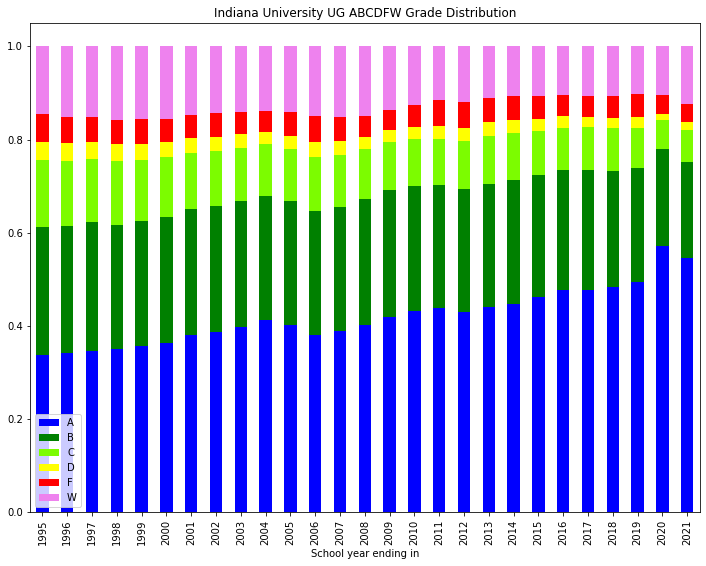

In [69]:
# Plot university-wide grade distribution
# Drop DEPARTMENT and COURSE
columns = ['A','B','C','D','F','W']
colors = ['blue', 'green', 'lawngreen', 'yellow', 'red', 'violet']
dg = df[df['COURSE'] < 500]
dg = dg[['SchYr'] + columns]
grade_dist_plot(dg, columns, "UG ABCDFW", "ug_abcdfw_", colors)

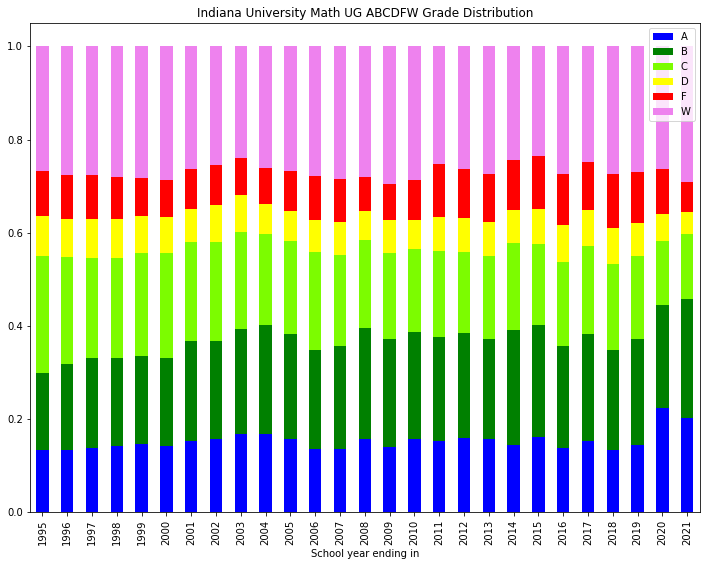

In [70]:
# Plot university-wide grade distribution
# Drop DEPARTMENT and COURSE
columns = ['A','B','C','D','F','W']
colors = ['blue', 'green', 'lawngreen', 'yellow', 'red', 'violet']
dg = df.copy()
dg = dg[(dg['COURSE'] < 500) & (dg['DEPARTMENT'] == 'MATH')]
dg = dg[['SchYr'] + columns]
grade_dist_plot(dg, columns, "Math UG ABCDFW", "math_ug_abcdfw_", colors)

In [98]:
# Sort DEPARTMENT by average GPA

Columns = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-','D+', 'D', 'D-', 'F']
GPA = [4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.3, 0.0]

# Compute department average GPA
y = 2020
dg = df.copy()
dg = dg[(dg['SchYr'] == y) & (dg['COURSE'] < 500)]
dg = dg[['DEPARTMENT'] + Columns]
dg = dg.groupby('DEPARTMENT').sum()
dg['Total'] = 0
dg['avgGPA'] = 0
for n,c in zip(GPA, Columns):
    dg['avgGPA'] += n*dg[c]
    dg['Total'] += dg[c]
dg['avgGPA'] /= dg['Total']

# Import department names
departments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IU_Department_names.csv', header=None)
departments = departments.rename(columns={0: 'DEPARTMENT', 1: 'DeptName'})
departments['DEPARTMENT'] = departments['DEPARTMENT'].apply(lambda s: s.replace(' ', ""))
departments = departments.set_index('DEPARTMENT')

# Sort by GPA
dg = dg.join(departments, on = 'DEPARTMENT')
dg = dg[['DeptName','avgGPA']].sort_values(by = 'avgGPA')
dg.to_csv('/content/drive/MyDrive/Colab Notebooks/IU_Dept_GPA_' + str(y) + '.csv')
dg.to_html('/content/drive/MyDrive/Colab Notebooks/IU_Dept_GPA_' + str(y) + '.html')
print(dg.head(20))
print(dg.tail(20))

                                   DeptName    avgGPA
DEPARTMENT                                           
REEI           Russian & East European Inst  2.166667
MATH                            Mathematics  2.398532
CHEM                              Chemistry  2.728971
ANAT                                Anatomy  2.741451
PHSL                             Physiology  2.784843
AST                               Astronomy  2.798190
ECON                              Economics  2.835571
CSCI                       Computer Science  2.857067
MSCI                       Medical Sciences  2.863439
SPEA               Public And Envir Affairs  2.916884
HIST                                History  2.935506
EAS          Earth and Atmospheric Sciences  2.939426
ARTH                            Art History  2.971312
FRIT                     French And Italian  2.978423
POLS                      Political Science  2.994098
AAAD                  Afro-American Studies  2.998558
HISP                        

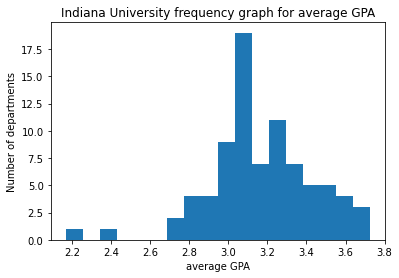

In [99]:
dg['avgGPA'].plot.hist(bins=18)
plt.title("Indiana University frequency graph for average GPA")
plt.xlabel('average GPA')
plt.ylabel('Number of departments')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/GPA.hist.jpg")

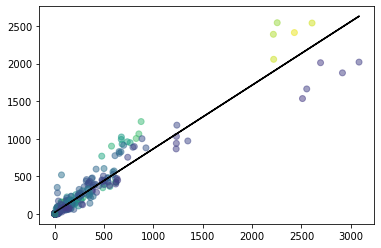

In [123]:
# Look at the relationship between D, F, and W columns
Columns = ['AR','BR','CR','DR', 'F', 'W']

dg = df.copy()
dg = dg[(dg['SchYr'].isin(range(2015,2020))) & (dg['COURSE'] < 500)]
dg = dg[['DEPARTMENT', 'SchYr'] + Columns]
dg = dg.groupby(['DEPARTMENT','SchYr']).sum()
dg['total'] = dg['AR'] + dg['BR'] + dg['CR'] + dg['DR'] + dg['F'] + dg['W']
dg['DF'] = dg['DR'] + dg['F']
dg['colors'] = (dg['DR'] + dg['F'] + dg['W'])/dg['total']

# Linear Regression
# https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
X = dg['W'].values.reshape(-1, 1)  
Y = dg['DF'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X) 

# Plots
plt.scatter(X, Y, c=dg['colors'], alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IU_DF-W-ratio.jpg')


In [127]:
dh = dg[['DR','F','W']
]
mat = dh.corr()
print(mat)

          DR         F         W
DR  1.000000  0.956144  0.943502
F   0.956144  1.000000  0.946313
W   0.943502  0.946313  1.000000
